In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
All4=pd.read_csv("data/Complete_Data/All_Four_Datasets.csv")
All4.head()

,Date,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area,...,February,January,July,June,March,May,November,October,September,Payday
0,2010-01-01,New Year's Day,True,1.0,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",...,0,1,0,0,0,0,0,0,0,True
1,2010-01-02,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",...,0,1,0,0,0,0,0,0,0,False
2,2010-01-03,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",...,0,1,0,0,0,0,0,0,0,False
3,2010-01-04,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",...,0,1,0,0,0,0,0,0,0,False
4,2010-01-05,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",...,0,1,0,0,0,0,0,0,0,False


In [2]:
data = All4.set_index('Date')
data.head()

,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,...,February,January,July,June,March,May,November,October,September,Payday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,New Year's Day,True,1.0,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,...,0,1,0,0,0,0,0,0,0,True
2010-01-02,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,...,0,1,0,0,0,0,0,0,0,False
2010-01-03,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,...,0,1,0,0,0,0,0,0,0,False
2010-01-04,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,...,0,1,0,0,0,0,0,0,0,False
2010-01-05,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,...,0,1,0,0,0,0,0,0,0,False


In [3]:
data.columns

Index(['Holiday', 'Public Holidays', 'Indicator', 'School Holidays',
       'labor force', 'employment', 'unemployment', 'unemployment rate',
       'Area', 'DAY', 'MONTH', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'TOTAL', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN', 'TOBS', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Payday'],
      dtype='object')

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=111)
print(test.shape)
print(train.shape)

(658, 47)
(2629, 47)


In [5]:
DX =['Public Holidays','unemployment rate','PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday', 'April', 'August', 'December', 'February', 'January','July', 'June', 'March', 'May', 'November', 'October', 'September']
DY = 'TOTAL'

In [6]:
X_train= train[DX]
y_train= train[DY]
X_test= test[DX]
y_test= test[DY]

MLPR

In [9]:
import sklearn.neural_network as nn
MLP = nn.MLPRegressor(random_state = 0)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
testscore = MLP.score(X_test,y_test)
trainscore = MLP.score(X_train, y_train)
print("MLPC test:", testscore)
print("MLPC train:", trainscore)

MLPC test: 0.33476291280086323
MLPC train: 0.34121360493188413


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.625811119455767
Mean Squared Error: 257.3437107841108
Root Mean Squared Error: 16.041936004862716


In [12]:
print("r2 of MLPR is",metrics.r2_score(y_test, y_pred))

r2 of MLPR is 0.33476291280086323


In [13]:
import sklearn.neural_network as nn
from sklearn.metrics import accuracy_score
random = [1,2,3,4,5,6,7,8,9,10]
trainscore = []
testscore = []
for r in random:
    MLP = nn.MLPRegressor(random_state = r)
    MLP.fit(X_train, y_train)
    trainscore.append(MLP.score(X_train,y_train))
    testscore.append(MLP.score(X_test,y_test))    
       

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

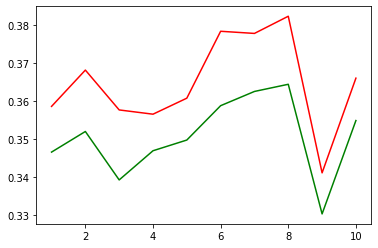

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(random, trainscore, c = 'red')
plt.plot(random, testscore, c = 'green')

DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DC = DecisionTreeRegressor(max_depth = 5)
DC.fit(X_train, y_train)
y_pred1 = DC.predict(x_test)

In [ ]:
testscore = DC.score(X_test,y_test)
trainscore = DC.score(X_train, y_train)
print("DC test:", testscore)
print("DC train:", trainscore)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

In [ ]:
print("r2 of Decision Tree is",metrics.r2_score(y_test, y_pred1))

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
depth = [1,2,3,4,5,6,7,8,9,10]
trainscore = []
testscore = []
for d in depth:
    DC = DecisionTreeRegressor(max_depth = d)
    DC.fit(X_train, y_train)
    trainscore.append(DC.score(X_train, y_train))
    testscore.append(DC.score(X_test, y_test))
       

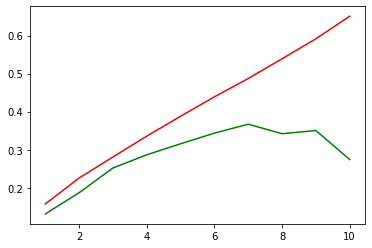

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(depth, trainscore, c = 'red')
plt.plot(depth, testscore, c = 'green')